In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [9]:
#this is for ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('data.csv')
data

,X,Y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569096
332,542.005901,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


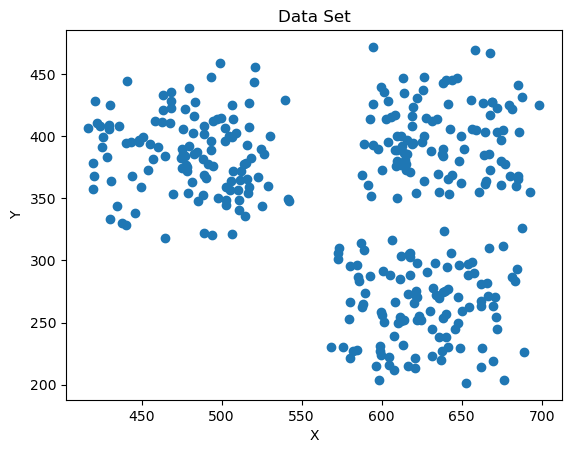

In [11]:
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

K_means Clustering

In [12]:
n_cluster=range(1,10)
sse=[]
for k in n_cluster:
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(data)
    sse.append(model.inertia_)


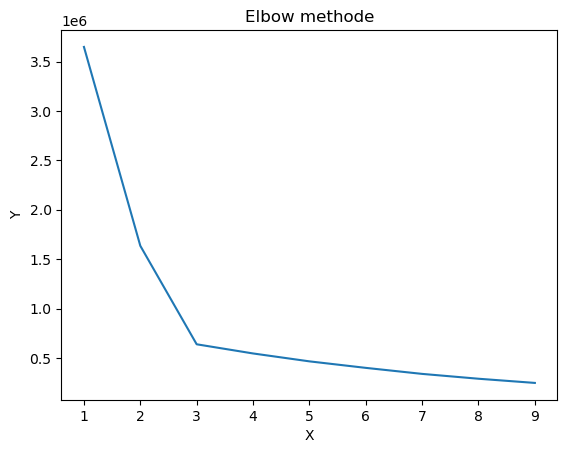

In [6]:
plt.plot(n_cluster,sse)
plt.title('Elbow methode')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [7]:
n_clusters = range(2,10)

for k in n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k,init='k-means++')
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data,cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        round(silhouette_avg,4),
    )


c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.519
For n_clusters = 3 The average silhouette_score is : 0.6113


c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

For n_clusters = 4 The average silhouette_score is : 0.5045
For n_clusters = 5 The average silhouette_score is : 0.4028


c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

For n_clusters = 6 The average silhouette_score is : 0.3557


c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.3629
For n_clusters = 8 The average silhouette_score is : 0.3738


c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

For n_clusters = 9 The average silhouette_score is : 0.3808


K-means++

In [164]:
model=KMeans(n_clusters=3,init='k-means++')
predict=model.fit_predict(data)


In [166]:
data['cluster']=predict
data

,X,Y,cluster
0,516.012706,393.014514,1
1,436.211762,408.656585,1
2,512.052601,372.022014,1
3,489.140464,401.807159,1
4,446.207986,338.516682,1
...,...,...,...
331,638.916471,323.569096,0
332,542.005901,347.527070,1
333,611.964612,377.254978,2
334,520.654168,455.996453,1


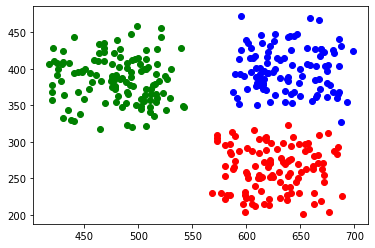

In [169]:
cluster1=data[data['cluster']==0]
cluster2=data[data['cluster']==1]
cluster3=data[data['cluster']==2]
plt.scatter(cluster1.X,cluster1.Y,color='red')
plt.scatter(cluster2.X,cluster2.Y,color='green')
plt.scatter(cluster3.X,cluster3.Y,color='blue')
plt.show()

Hierarchical Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage


In [8]:
data=pd.read_csv('data.csv')

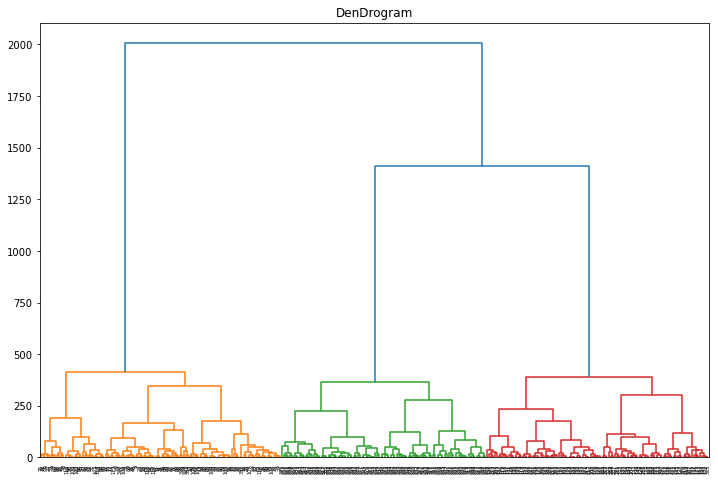

In [12]:
plt.figure(figsize=(12,8))
plt.title('DenDrogram')
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

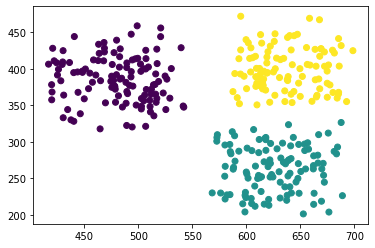

In [16]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.show()

DBScan clustering

In [13]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
dbscan=DBSCAN(eps=20,min_samples=3)
model=dbscan.fit(data)


In [50]:
labels=model.labels_

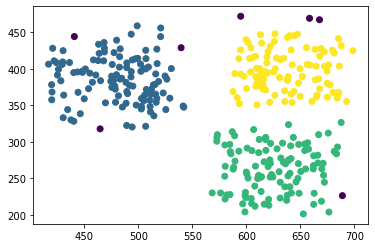

In [51]:
plt.scatter(data['X'], data['Y'], c=labels)
plt.show()